In [1]:
import model
import utils
import scipy.stats as ss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def _create_z_values(model, ticker, stats_data=None, \
                     auto_update_tolerances=False, *args, **kwargs):
    freq_range, frequencies = _create_freq()
    try:
        timezone = kwargs['timezone']
    except KeyError:
        timezone = None
    try:
        start = kwargs['start']
    except KeyError:
        start = None
    _, means, stds = _get_price_moves_and_stats(ticker=ticker, \
                                                stats_data=stats_data,
                                                timezone=timezone, \
                                                start=start)
    if auto_update_tolerances:
        utils._print_issue('STATS-INFO', 'Auto update of tolerances!')
        current_value = utils.download_data(tickers=ticker, \
                                            start=(pd.Timestamp.today() - pd.Timedelta('1 days')), \
                                            value='Close').values[-1]
        current_tols = model.break_values[ticker] - current_value
        utils._print_issue('STATS-INFO', 'Current value: {}!'.format(current_value))
        utils._print_issue('STATS-INFO', 'New tolerances: {}!'.format(current_tols))
        tol_unten = np.sort(current_tols)[0] / current_value
        tol_oben = np.sort(current_tols)[1] / current_value
    else:
        tol_unten = np.sort(model.tolerances[ticker])[0] / current_value
        tol_oben = np.sort(model.tolerances[ticker])[1] / current_value
    z_values_unten = (tol_unten - means) / stds
    z_values_oben = (tol_oben - means) / stds
    return np.array([z_values_unten, z_values_oben]), np.array([tol_unten, tol_oben]), means

def _get_price_moves_and_stats(ticker, stats_data=None, \
                               timezone=None, start=None):
    if timezone is None:
        timezone = 'Europe/London'
    if start is None:
        start = pd.Timestamp(2019, 1, 1, 0)
    if stats_data is None:
        stats_data = utils.download_data(tickers=ticker, start=start, \
                                         interval='60m', value='Close')
    freq_range, frequencies = _create_freq()
    price_movements = dict.fromkeys(frequencies)
    means = np.zeros(freq_range.shape)
    stds = np.zeros(freq_range.shape)
    for index, freq in enumerate(frequencies):
        current_time = start
        current_rng = pd.date_range(start=current_time, end=pd.Timestamp.today(), \
                                    freq=freq, tz=timezone, name='Datetime')
        current_moves = stats_data[current_rng].pct_change()
        current_moves = current_moves[~np.isnan(current_moves)]
        means[index] = np.mean(current_moves)
        stds[index] = np.std(current_moves)
        price_movements[freq] = current_moves
        hours = np.flip(np.arange(1,25,1))
        df = pd.DataFrame()
        df['hours'] = pd.Series(hours)
        df['pct_change'] = pd.Series(np.flip(means))
        first_key = list(price_movements.values())[1]
        print(first_key)
    return price_movements, means, stds, df, df.plot(x='hours',y='pct_change'), first_key

def _create_freq():
    freq_range = np.arange(1, 25, 1)
    frequencies = [freq + 'h' for freq in freq_range.astype(str)]
    return freq_range, frequencies

[*********************100%***********************]  1 of 1 completed
None
Datetime
2019-01-01 02:00:00+00:00   -0.006174
2019-01-01 04:00:00+00:00    0.001328
2019-01-01 06:00:00+00:00    0.002127
2019-01-01 08:00:00+00:00    0.005916
2019-01-01 10:00:00+00:00   -0.001666
                               ...   
2020-07-27 13:00:00+01:00    0.001329
2020-07-27 15:00:00+01:00    0.014307
2020-07-27 17:00:00+01:00    0.023823
2020-07-27 19:00:00+01:00    0.015979
2020-07-27 21:00:00+01:00   -0.000284
Freq: 2H, Name: Close, Length: 6886, dtype: float64
Datetime
2019-01-01 02:00:00+00:00   -0.006174
2019-01-01 04:00:00+00:00    0.001328
2019-01-01 06:00:00+00:00    0.002127
2019-01-01 08:00:00+00:00    0.005916
2019-01-01 10:00:00+00:00   -0.001666
                               ...   
2020-07-27 13:00:00+01:00    0.001329
2020-07-27 15:00:00+01:00    0.014307
2020-07-27 17:00:00+01:00    0.023823
2020-07-27 19:00:00+01:00    0.015979
2020-07-27 21:00:00+01:00   -0.000284
Freq: 2H, Name: Clos

({'10h': Datetime
  2019-01-01 10:00:00+00:00    0.001490
  2019-01-01 20:00:00+00:00    0.007517
  2019-01-02 06:00:00+00:00    0.014745
  2019-01-02 16:00:00+00:00    0.021891
  2019-01-03 02:00:00+00:00    0.002104
                                 ...   
  2020-07-26 03:00:00+01:00    0.006714
  2020-07-26 13:00:00+01:00    0.021227
  2020-07-26 23:00:00+01:00    0.003066
  2020-07-27 09:00:00+01:00    0.025576
  2020-07-27 19:00:00+01:00    0.066390
  Freq: 10H, Name: Close, Length: 1377, dtype: float64, '11h': Datetime
  2019-01-01 11:00:00+00:00    0.000312
  2019-01-01 22:00:00+00:00    0.007691
  2019-01-02 09:00:00+00:00    0.018880
  2019-01-02 20:00:00+00:00    0.024939
  2019-01-03 07:00:00+00:00   -0.008752
                                 ...   
  2020-07-26 01:00:00+01:00    0.010222
  2020-07-26 12:00:00+01:00    0.029363
  2020-07-26 23:00:00+01:00   -0.005495
  2020-07-27 10:00:00+01:00    0.032326
  2020-07-27 21:00:00+01:00    0.059115
  Freq: 11H, Name: Close, Leng

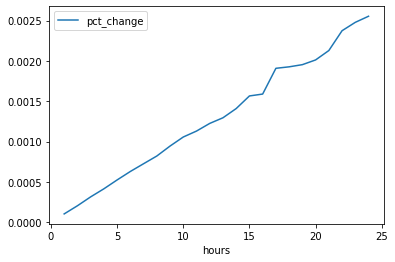

In [2]:
ticker = "BTC-USD"

_get_price_moves_and_stats(ticker, stats_data=None, \
                               timezone=None, start=None)



In [3]:
def calc_probs(model, time=None, tickers='all', stats_data=None, \
               auto_update_tolerances=False, *args, **kwargs):

    import matplotlib.pyplot as plt
    if tickers == 'all':
        tickers = model.tickers
    else:
        tickers = utils.check_ticker_input(tickers_input=tickers, \
                                           tickers_avail=model.tickers)
    try:
        timezone = kwargs['timezone']
    except KeyError:
        timezone = None
    try:
        start = kwargs['start']
    except KeyError:
        start = None
    for ticker in tickers:
        utils._print_issue(None, '=' * 80)
        utils._print_issue('INFO', 'Current ticker: {}'.format(ticker))
        z_values, tols, means = _create_z_values(model=model, ticker=ticker, \
                                                 stats_data=stats_data, timezone=timezone, \
                                                 start=start, \
                                                 auto_update_tolerances=auto_update_tolerances)

        freq_range, frequencies = _create_freq()
        delta_t = model.data.index[-1].to_datetime64() - pd.Timestamp.now().to_datetime64()
        delta_t = pd.Timedelta(delta_t).seconds / 3600

        arg = np.argsort(tols)
        value_arg = np.argsort(model.break_values[ticker])
        probs = ss.norm.cdf(z_values) * 100
        # do 1 - if:
        flip_arg = np.where(z_values > 0)
        probs[np.where(z_values > 0)] = (1 - ss.norm.cdf(z_values[flip_arg])) * 100
        poly_deg = 5
        poly_probs = np.zeros(2)
        fig, axs = plt.subplots(2, 1, figsize=(16, 9), sharex=True, sharey=True)
        for n, ax in enumerate(axs):
            ax.plot(frequencies, probs[n], \
                    label='Probability')
            ax.vlines(delta_t, np.min(probs), np.max(probs), label='Time to deadline')
            poly_line = np.poly1d(np.polyfit(freq_range, probs[n], poly_deg))
            ax.plot(frequencies, poly_line(freq_range), 'r', label='Polyfit of deg {}'.format(poly_deg))
            title = 'Ticker: {} - Break Value: {} - Tolerance: {}'.format(ticker, \
            model.break_values[ticker][value_arg[n]], tols[arg[n]])
            current_prob = poly_line(delta_t)
            ax.text(x=delta_t - .25, y=(np.max(probs) + np.min(probs))*.5, \
                    s='{:.2f}%'.format(current_prob), fontsize='larger')
            ax.set_title(title, fontsize='large')
            ax.legend()
            ax.grid()
            ax.yaxis.get_label().set_fontsize('larger')
            ax.xaxis.get_label().set_fontsize('larger')
            poly_probs[n] = current_prob

        ax.invert_xaxis()
        plt.setp(axs[-1], xlabel='Time to break value [h]')
        plt.setp(axs, ylabel='Probability [%]')
        prob_between = np.abs(np.diff(poly_probs))[0]
        for n, prob in enumerate(poly_probs):
            utils._print_issue('STATS-EVAL', \
                               'Probability for tol={:.5f}: {:.2f}%'.format(tols[arg][n], prob))

        utils._print_issue('STATS-EVAL', \
                           'Probability between: {:.2f}%'.format(prob_between))
        plt.show()

In [4]:
calc_probs(model=imag_model, tickers='all', auto_update_tolerances=True)

NameError: name 'imag_model' is not defined